**Assignment 5 - Programming portion**
**EC3389 - James LeDoux**

My approach as follows:

I began by running LogisticRegressionCV to eliminate features. At its optimal level, this left me with 37 non-zero features. These 37 features are my answer to question one.  I then run 5-fold cross validation on a logistic regression model. My answer to question two (estimating the coefficients) is the set of coefficients given by the best model found during this process. My answer to question three was my cross-validation MSE, also determined during this process. To extend this answer, I also include a confusion matrix at the end of the notebook. 

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation, datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [212]:
data = pd.read_csv("../data.csv")
y = data['Y']
data = data.drop('Y', 1)
data = data.drop('Unnamed: 0', 1)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2991,X2992,X2993,X2994,X2995,X2996,X2997,X2998,X2999,X3000
0,-4.589817,-2.186313,-0.918072,0.994456,-1.643339,0.562897,0.871649,1.645830,-2.246300,0.293383,...,1.316473,1.390242,-3.113475,-0.856392,4.717735,3.271560,-3.842866,1.951035,-3.268676,-3.486528
1,-1.932005,3.409547,-4.068428,-0.653186,-2.209341,4.181775,-0.386069,-4.761591,-0.402478,4.100881,...,-2.431568,-4.795004,4.948272,-4.747840,4.994316,-1.031691,2.470805,1.708033,2.322733,4.224387
2,0.437788,-3.771317,-4.990487,0.477881,-0.137070,-1.591236,-4.346859,-1.721320,4.796643,-2.855409,...,3.462669,4.386071,2.125671,-2.330933,-2.959368,-4.888772,4.643801,-1.187435,-3.244609,-4.497003
3,-0.949226,-4.555874,-0.704534,3.862392,-0.821387,1.230358,3.851150,-1.610159,-2.463466,-3.492688,...,2.383281,-1.757180,-4.993467,-3.424699,-0.581444,-1.865997,-4.177863,-4.196769,0.781339,-2.883281
4,3.512552,1.290331,0.383730,-1.057689,1.835562,2.965427,-3.994274,-2.195604,4.841798,0.620592,...,4.740132,-2.491019,-4.629763,4.283172,0.612778,4.668735,1.077373,0.060312,-2.878469,2.312747


In [ ]:
#PART ONE: USING LOGISTIC-CV TO ELIMINATE FEATURES

In [213]:
CVmodel = LogisticRegressionCV(cv=10, penalty='l1', solver='liblinear').fit(data,y)

In [214]:
CVmodel.coef_

array([[ 0.1225449 , -0.01734448, -0.02950021, ...,  0.        ,
         0.        ,  0.        ]])

In [215]:
#convert coefficients to absolute values, only keep those that are > 0
coefficientDf = pd.DataFrame()
coefficientDf['coeffs'] = np.abs(CVmodel.coef_)[0]
coefficientDf = coefficientDf.sort('coeffs', ascending=False)

print("original data frame has " + str(len(coefficientDf)) + " features")  
indexList = coefficientDf[coefficientDf['coeffs'] >0].index.tolist() #indexes of non-zero coefficients
print("kept " + str(len(indexList)) + " features after LassoCV")
coefficientDf.head()

original data frame has 3000 features
kept 37 features after LassoCV


/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,coeffs
27,0.246745
14,0.241596
13,0.240603
34,0.240074
20,0.233806


NameError: name 'X' is not defined

In [216]:
#iterate through index list, dropping vars that are not in it
for i in range(1,len(data.columns)+1):
    if (i-1) in indexList:
        pass
    else:
        name = "X" + str(i)
        data = data.drop(name, 1)

In [218]:
"""
Applying cross validation here. Taking the best score and model from the n folds I test. 
Keeping the best model's coefficients as my most accurate set. These coefficients are my 
answer to question number two. 

Also, I realize that taking MSE might be a bit overkill here since model.score() appears to be
1-MSE. I could not verify that this was the case in the documentation, however, so better safe
than sorry.
"""
model = LogisticRegression()

mse_scores = []
cv = KFold(n=data.shape[0] ,n_folds = 5)
max_score = -float("inf")   #score here is a mean accuracy, not mean error, so I maximize
bestModel = None
true_Y = None
pred_Y = None
for train, test in cv:
    train_x = data.ix[train,:]
    train_y = y.ix[train]
    test_x = data.ix[test,:]
    test_y = y.ix[test]

    model.fit(train_x, train_y)
    preds = model.predict(test_x)
    score = model.score(test_x, test_y)
    if score > max_score:
        max_score = score
        bestModel = model
        true_Y = test_y    #keeping these values for the confusion matrix in the following cell
        pred_Y = preds
    sqError = (preds - test_y)**2
    mse = np.mean(sqError)
    mse_scores.append(mse)  

print("MEAN ACCURACY SCORES DURING CROSS VALUDATION: " + str(val_scores))

coeffs = bestModel.coef_   
cols = data.columns
print("coefficient estimates: ")    #ANSWER TO QUESTION TWO 
for i in range(len(coeffs[0])):
    variable = cols[i]
    coeff = coeffs[0][i]
    print(str(variable) + ": " + str(coeff))

print("MSE scores:")
print(mse_scores)
CVmse = np.mean(mse_scores)
print("Cross-Validated MSE: " + str(CVmse))  #ANSWER TO PART 3 (MEASURE OF ACCURACY)

MEAN ACCURACY SCORES DURING CROSS VALUDATION: [0.98599999999999999, 0.98899999999999999, 0.98999999999999999, 0.99099999999999999, 0.99099999999999999]
coefficient estimates: 
X1: 1.37932625533
X2: -0.40026780933
X3: -0.433319381198
X4: 2.20288571887
X5: -1.3067224754
X6: -2.25526521236
X7: 1.83083506555
X8: 2.23861326079
X9: 0.395962552348
X10: -0.409368601321
X11: -0.853273958878
X12: 0.946893250543
X13: -0.929025504375
X14: 2.31453495143
X15: 2.2879621236
X16: -1.37674954767
X17: 0.449043180597
X18: 1.34344390899
X19: -2.2521312912
X20: -0.436591997619
X21: -2.24834427315
X22: -0.473251771207
X23: 0.856404053153
X24: -1.79637712101
X25: -0.460628025841
X26: 2.212268048
X27: 1.75195602193
X28: -2.24862938569
X29: 0.88846297215
X30: -1.42754921101
X31: 2.25149700315
X32: 1.36625273876
X33: 1.32317662679
X34: -0.829798923922
X35: 2.27032954057
X36: -1.39197614717
X37: 1.76440939113
MSE scores:
[0.013, 0.011, 0.011, 0.009, 0.007]
Cross-Validated MSE: 0.0102


confusion matrix: 
[[489   1]
 [  6 504]]


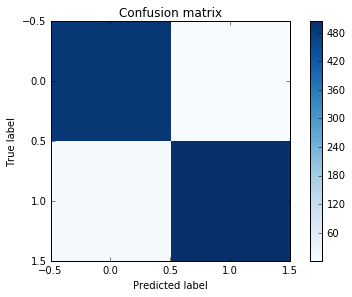

In [219]:
#ANOTHER WAY TO VIEW ACCURACY: CONFUSION MATRIX
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

c_mat = confusion_matrix(true_Y, pred_Y)
plot_confusion_matrix(c_mat)
print("confusion matrix: ")
print(str(c_mat))